## Single Task plots

In [1]:
import os
import json
import matplotlib.pyplot as plt

In [2]:
def load_model_data(parent_folder):
    
    model_data = []
    single_task_path = os.path.join(parent_folder, "Single Task")
    if os.path.isdir(single_task_path):
        for model_folder in os.listdir(single_task_path):
            model_folder_path = os.path.join(single_task_path, model_folder)
            if os.path.isdir(model_folder_path):
                json_file_path = os.path.join(
                    model_folder_path, f"{model_folder}_training_info.json"
                )
                if os.path.isfile(json_file_path):
                    with open(json_file_path, "r") as file:
                        model_data.append(json.load(file))
    return model_data


def plot_metric(metric, title, ylabel, model_data, linestyle="-", custom_ylim=None):

    if not model_data:
        print("No data to plot. Ensure JSON files are correctly loaded.")
        return

    epochs = range(1, model_data[0]["epochs"] + 1)
    colors = plt.cm.tab10.colors

    plt.figure(figsize=(15, 10))
    for i, data in enumerate(model_data):
        plt.plot(
            epochs,
            data[metric],
            label=f'{data["Model"]}',
            linestyle=linestyle,
            color=colors[i % len(colors)],
        )
    plt.title(title, fontsize=16)
    plt.xlabel("Epochs", fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    if custom_ylim:
        plt.ylim(custom_ylim)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()


def plot_test_metrics(model_data):

    if not model_data:
        print("No data to plot. Ensure JSON files are correctly loaded.")
        return

    test_metrics = [(data["Model"], data["test_accuracy"], data["test_loss"]) for data in model_data]
    models, test_accuracies, test_losses = zip(*test_metrics)
    colors = plt.cm.tab10.colors

    # Test Accuracy
    plt.figure(figsize=(15, 5))
    plt.bar(models, test_accuracies, color=colors[: len(models)])
    plt.title("Test Accuracy Comparison", fontsize=16)
    plt.ylabel("Accuracy", fontsize=14)
    plt.xlabel("Model", fontsize=14)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

    # Test Loss
    plt.figure(figsize=(15, 5))
    plt.bar(models, test_losses, color=colors[: len(models)])
    plt.title("Test Loss Comparison", fontsize=16)
    plt.ylabel("Loss", fontsize=14)
    plt.xlabel("Model", fontsize=14)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()


def analyze_models(parent_folder):

    model_data = load_model_data(parent_folder)
    if not model_data:
        print("No models found. Please check the directory structure and JSON file names.")
        return

    # Training metrics
    plot_metric("train_accuracy", "Training Accuracy", "Accuracy", model_data, custom_ylim=(0.95, 1.0))
    plot_metric("train_loss", "Training Loss", "Loss", model_data)

    # Validation metrics
    plot_metric("val_accuracy", "Validation Accuracy", "Accuracy", model_data, linestyle="--", custom_ylim=(0.975, 1.0))
    plot_metric("val_loss", "Validation Loss", "Loss", model_data, linestyle="--")

    # Test performance
    plot_test_metrics(model_data)


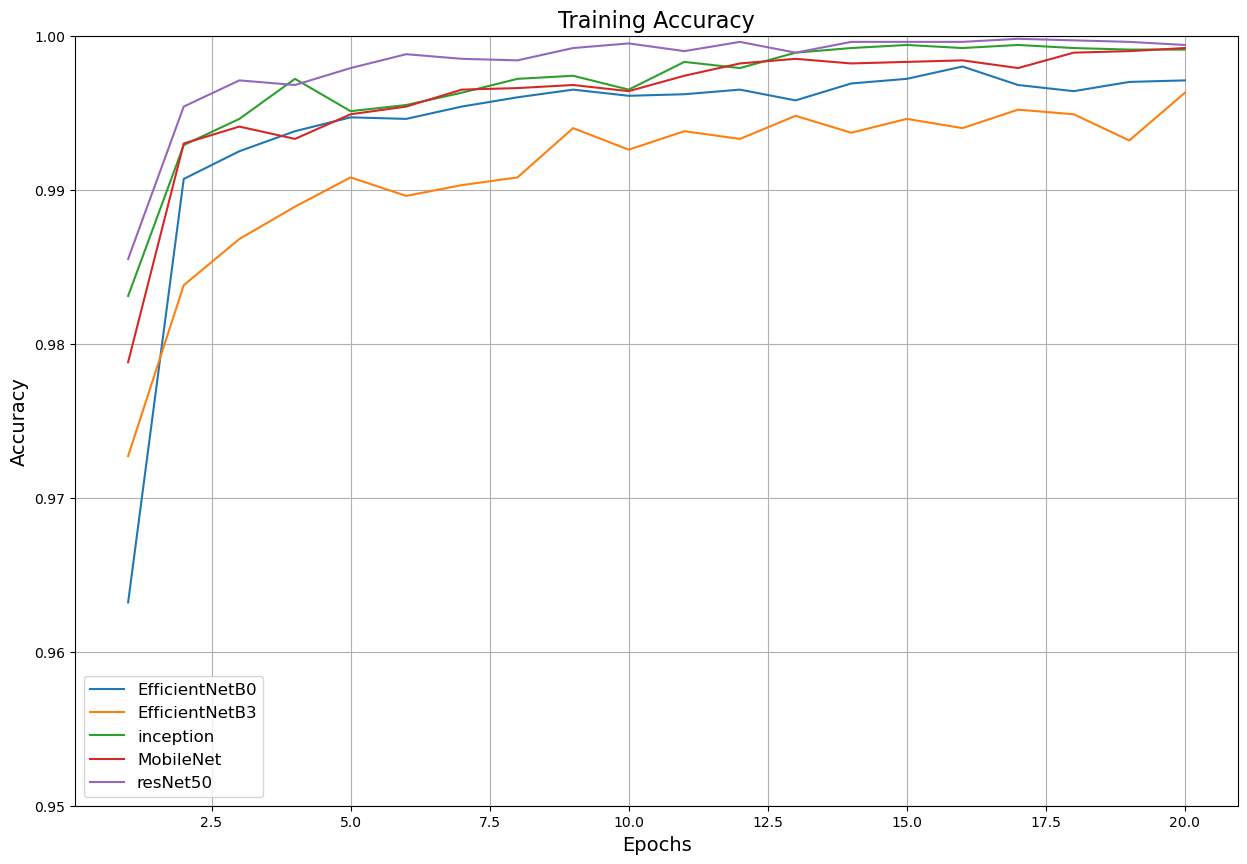

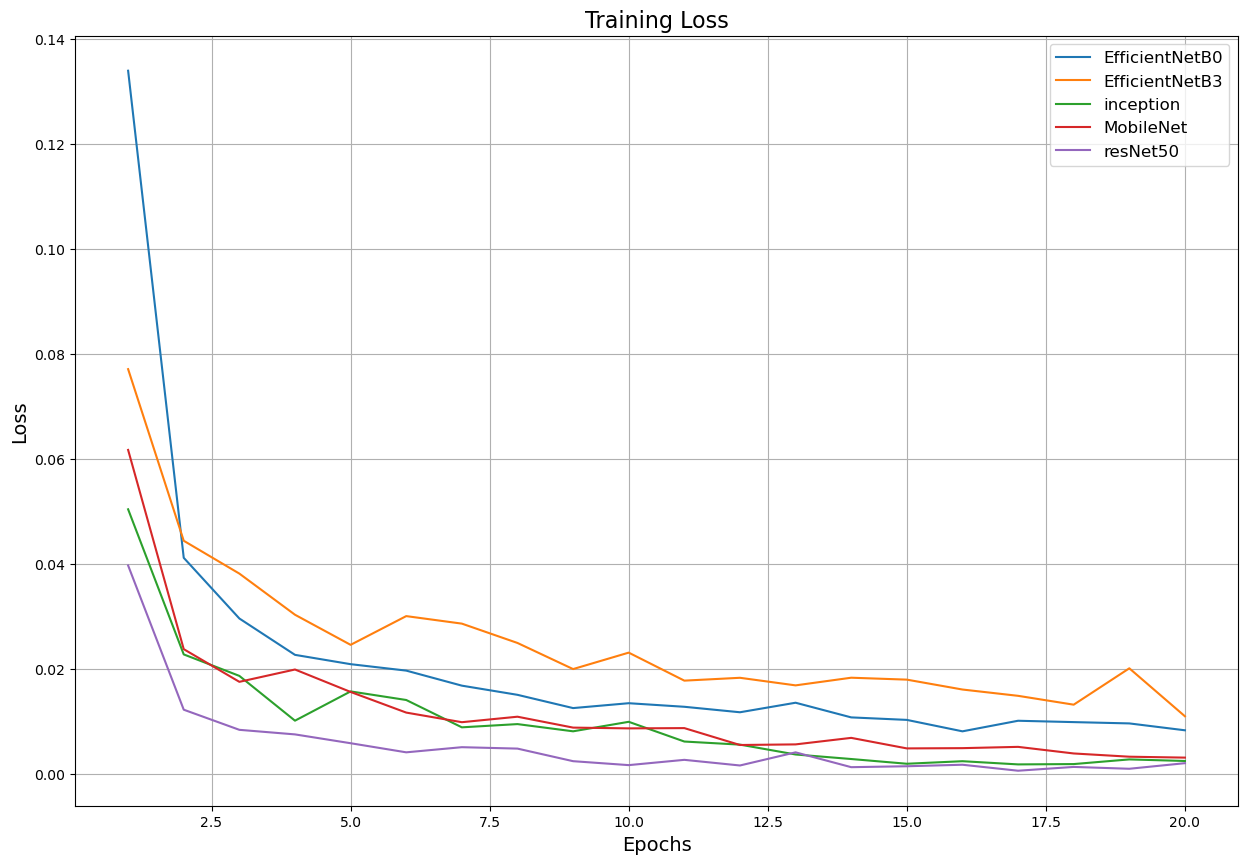

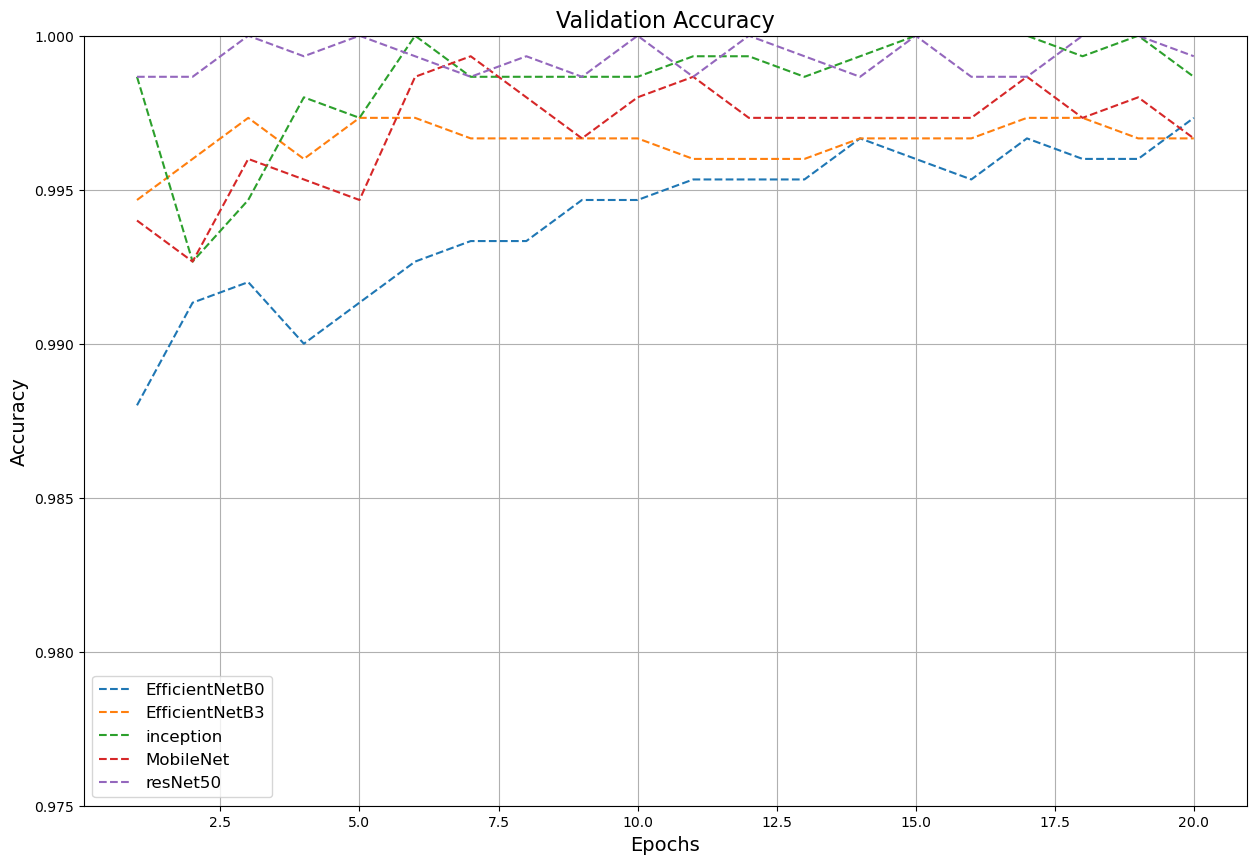

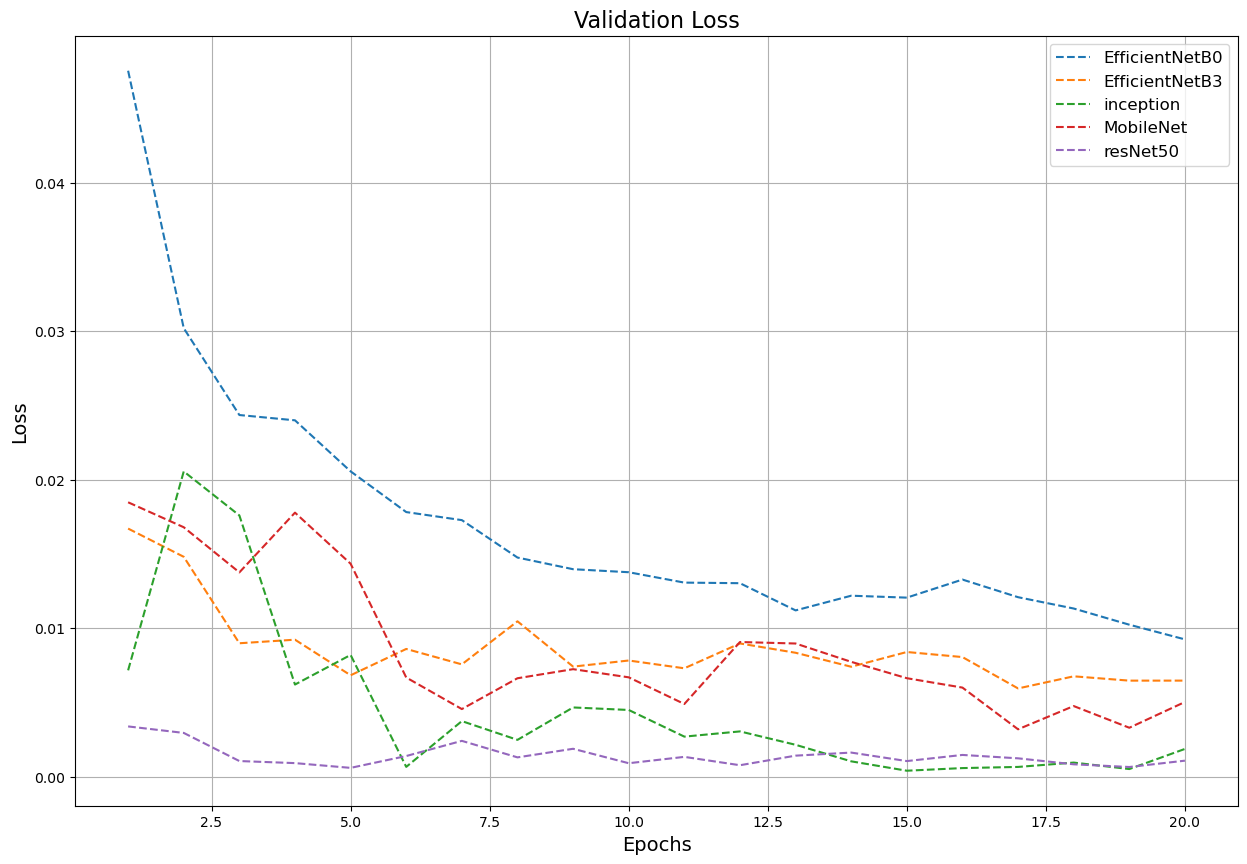

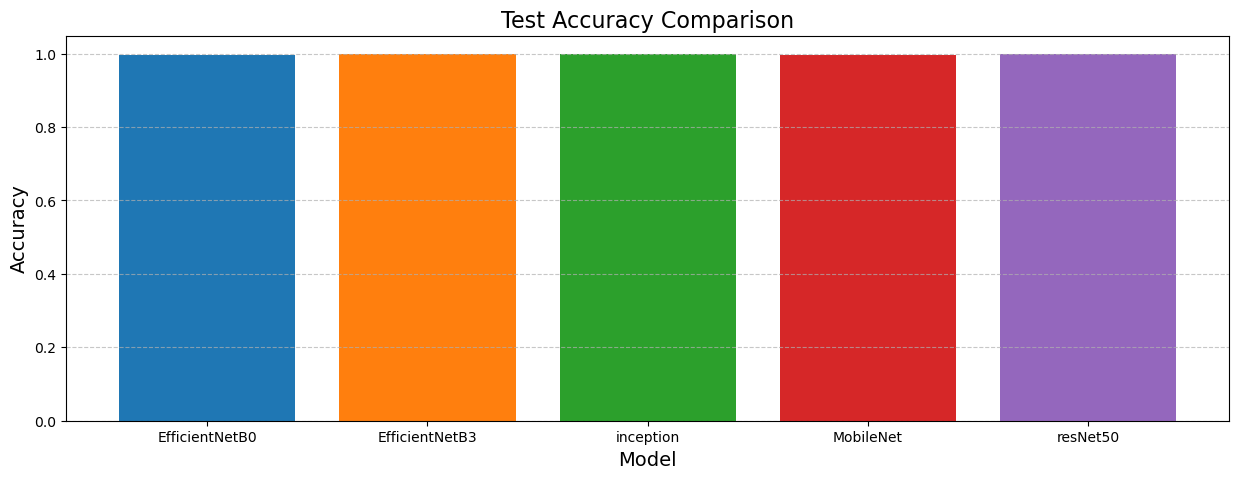

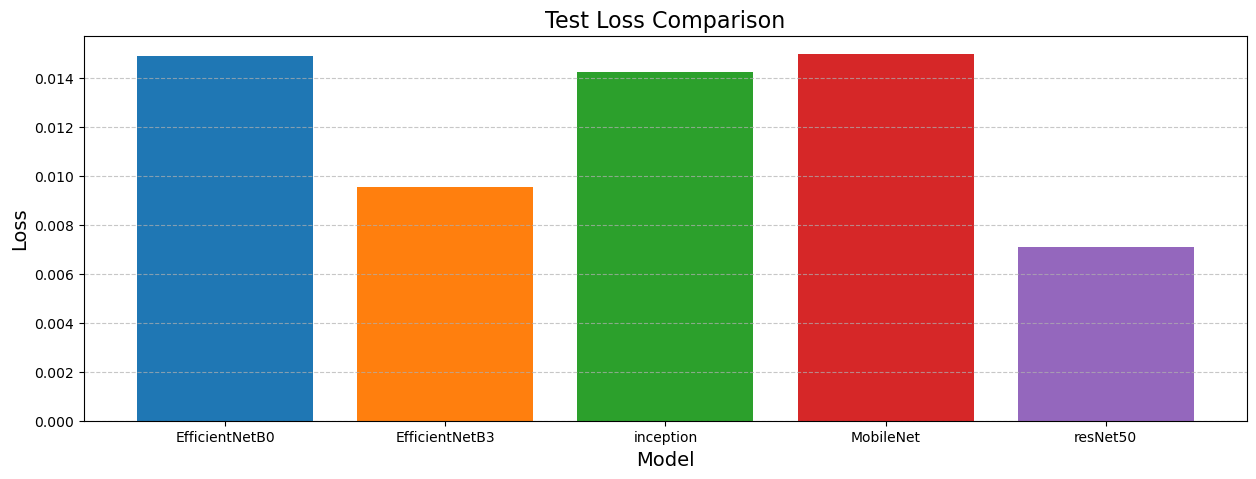

In [35]:
analyze_models("../results")

# Multi task plots

In [3]:
def plot_train_and_val_metrics(json_files):

    # Define colors for each file
    colors = ['blue', 'orange', 'green', 'red']

    # Plot Training Metrics
    plt.figure(figsize=(18, 8))
    for i, json_file in enumerate(json_files):
        with open(json_file, 'r') as f:
            data = json.load(f)

        # Extract train metrics and model name
        train_metrics = data['train_metrics']
        model_name = data['Model']
        epochs = range(1, data['epochs'] + 1)

        # Plot Loss
        plt.subplot(1, 4, 1)
        plt.plot(epochs, train_metrics['loss'], label=f'{model_name} - Train Loss', color=colors[i], linestyle='--')
        plt.title("Train Loss")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.legend()
        plt.grid(alpha=0.5)

        # Plot Face Accuracy
        plt.subplot(1, 4, 2)
        plt.plot(epochs, train_metrics['face_output_binary_accuracy'], label=f'{model_name} - Train Face Acc', color=colors[i], linestyle='--')
        plt.title("Train Face Accuracy")
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy")
        plt.legend()
        plt.grid(alpha=0.5)

        # Plot Age Accuracy
        plt.subplot(1, 4, 3)
        plt.plot(epochs, train_metrics['age_output_weighted_categorical_accuracy'], label=f'{model_name} - Train Age Acc', color=colors[i], linestyle='--')
        plt.title("Train Age Accuracy")
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy")
        plt.legend()
        plt.grid(alpha=0.5)

        # Plot Gender Accuracy
        plt.subplot(1, 4, 4)
        plt.plot(epochs, train_metrics['gender_output_weighted_binary_accuracy'], label=f'{model_name} - Train Gender Acc', color=colors[i], linestyle='--')
        plt.title("Train Gender Accuracy")
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy")
        plt.legend()
        plt.grid(alpha=0.5)

    plt.tight_layout()
    plt.show()

    # Plot Validation Metrics
    plt.figure(figsize=(18, 8))
    for i, json_file in enumerate(json_files):
        with open(json_file, 'r') as f:
            data = json.load(f)

        # Extract validation metrics and model name
        val_metrics = data['val_metrics']
        model_name = data['Model']
        epochs = range(1, data['epochs'] + 1)

        # Plot Loss
        plt.subplot(1, 4, 1)
        plt.plot(epochs, val_metrics['val_loss'], label=f'{model_name}', color=colors[i])
        plt.title("Validation Loss")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.legend()
        plt.grid(alpha=0.5)

        # Plot Face Accuracy
        plt.subplot(1, 4, 2)
        plt.plot(epochs, val_metrics['val_face_output_binary_accuracy'], label=f'{model_name}', color=colors[i])
        plt.title("Validation Face Accuracy")
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy")
        plt.legend()
        plt.grid(alpha=0.5)

        # Plot Age Accuracy
        plt.subplot(1, 4, 3)
        plt.plot(epochs, val_metrics['val_age_output_weighted_categorical_accuracy'], label=f'{model_name}', color=colors[i])
        plt.title("Validation Age Accuracy")
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy")
        plt.legend()
        plt.grid(alpha=0.5)

        # Plot Gender Accuracy
        plt.subplot(1, 4, 4)
        plt.plot(epochs, val_metrics['val_gender_output_weighted_binary_accuracy'], label=f'{model_name}', color=colors[i])
        plt.title("Validation Gender Accuracy")
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy")
        plt.legend()
        plt.grid(alpha=0.5)

    plt.tight_layout()
    plt.show()

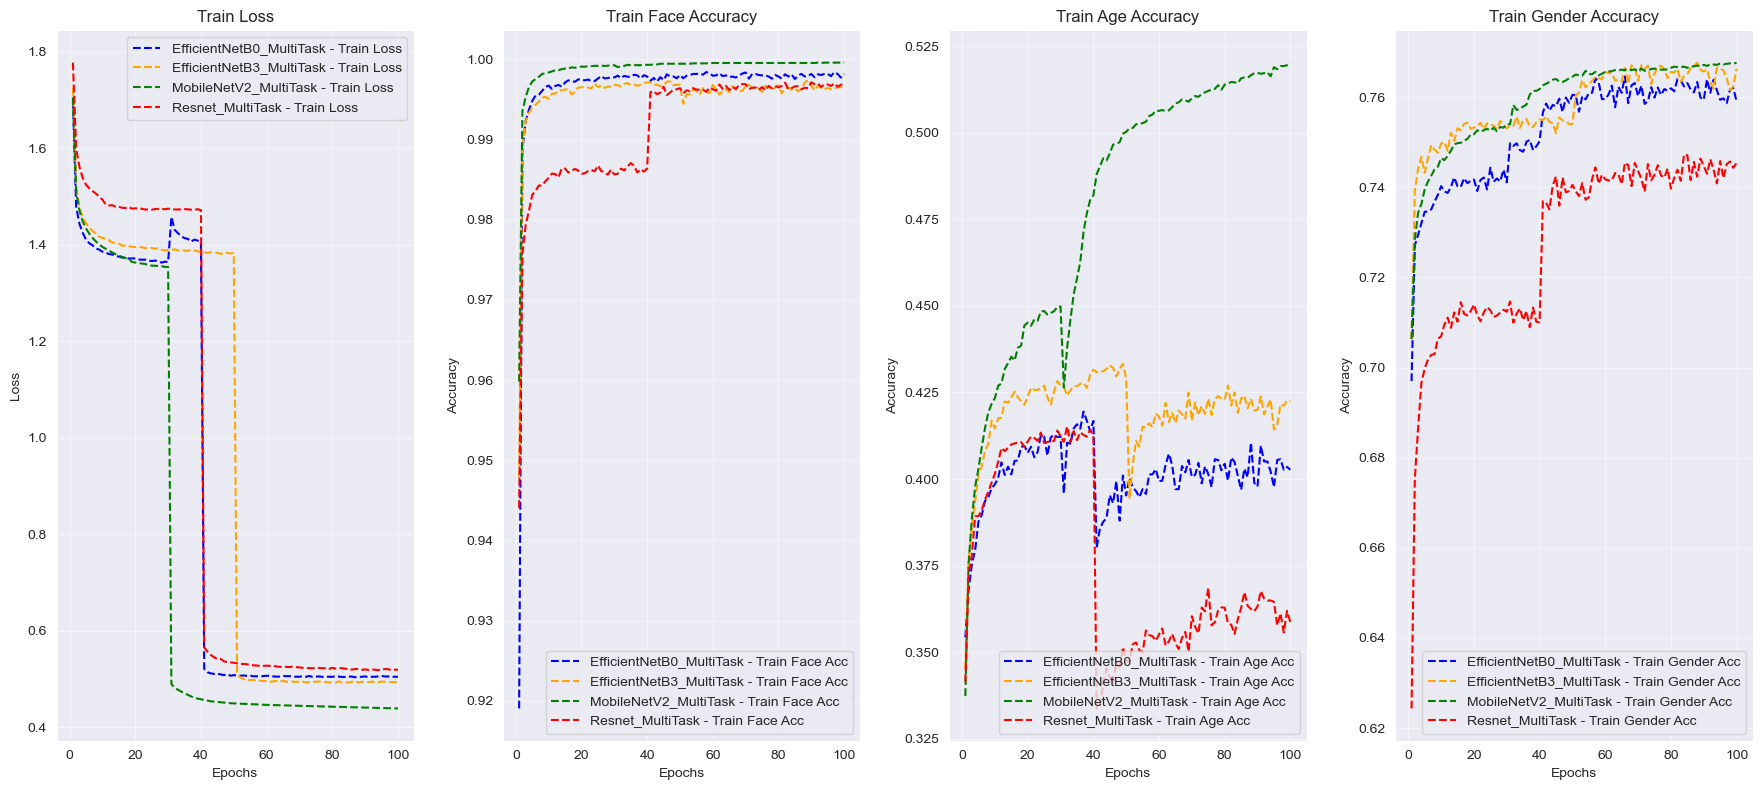

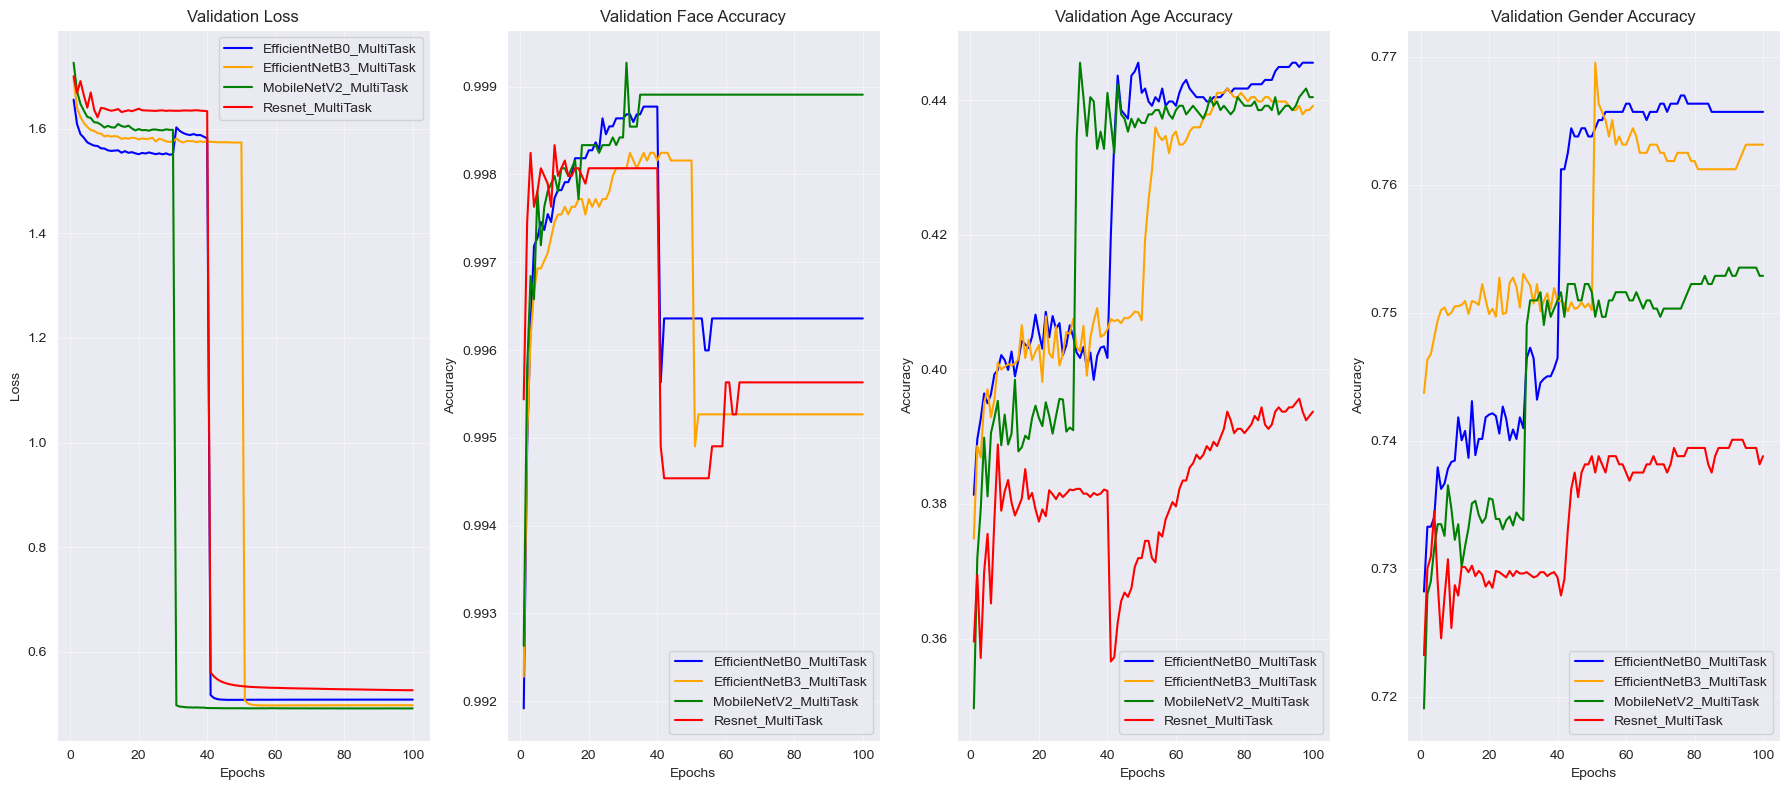

In [11]:
json_files = [
    "../results/Multi_Task/EfficientNetB0_MultiTask/EfficientNetB0_MultiTask_training_info.json",
    "../results/Multi_Task/EfficientNetB3_MultiTask/EfficientNetB3_MultiTask_training_info.json",
    "../results/Multi_Task/MobileNetV2_MultiTask/MobileNetV2_MultiTask_training_info.json",
    "../results/Multi_Task/Resnet_MultiTask/Resnet_MultiTask_training_info.json"
]

plot_train_and_val_metrics(json_files)

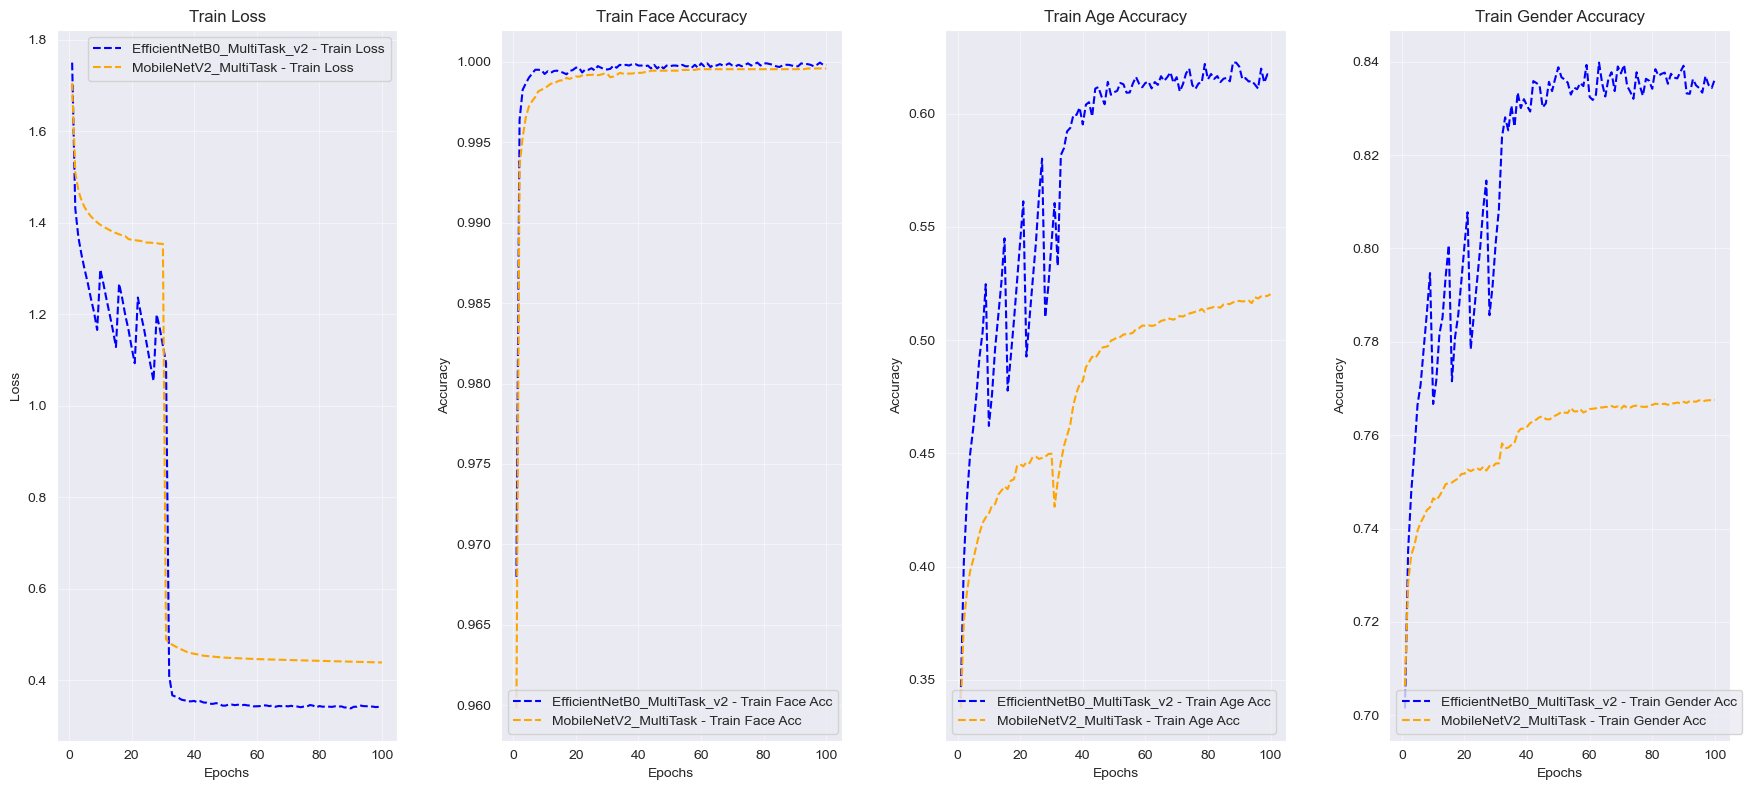

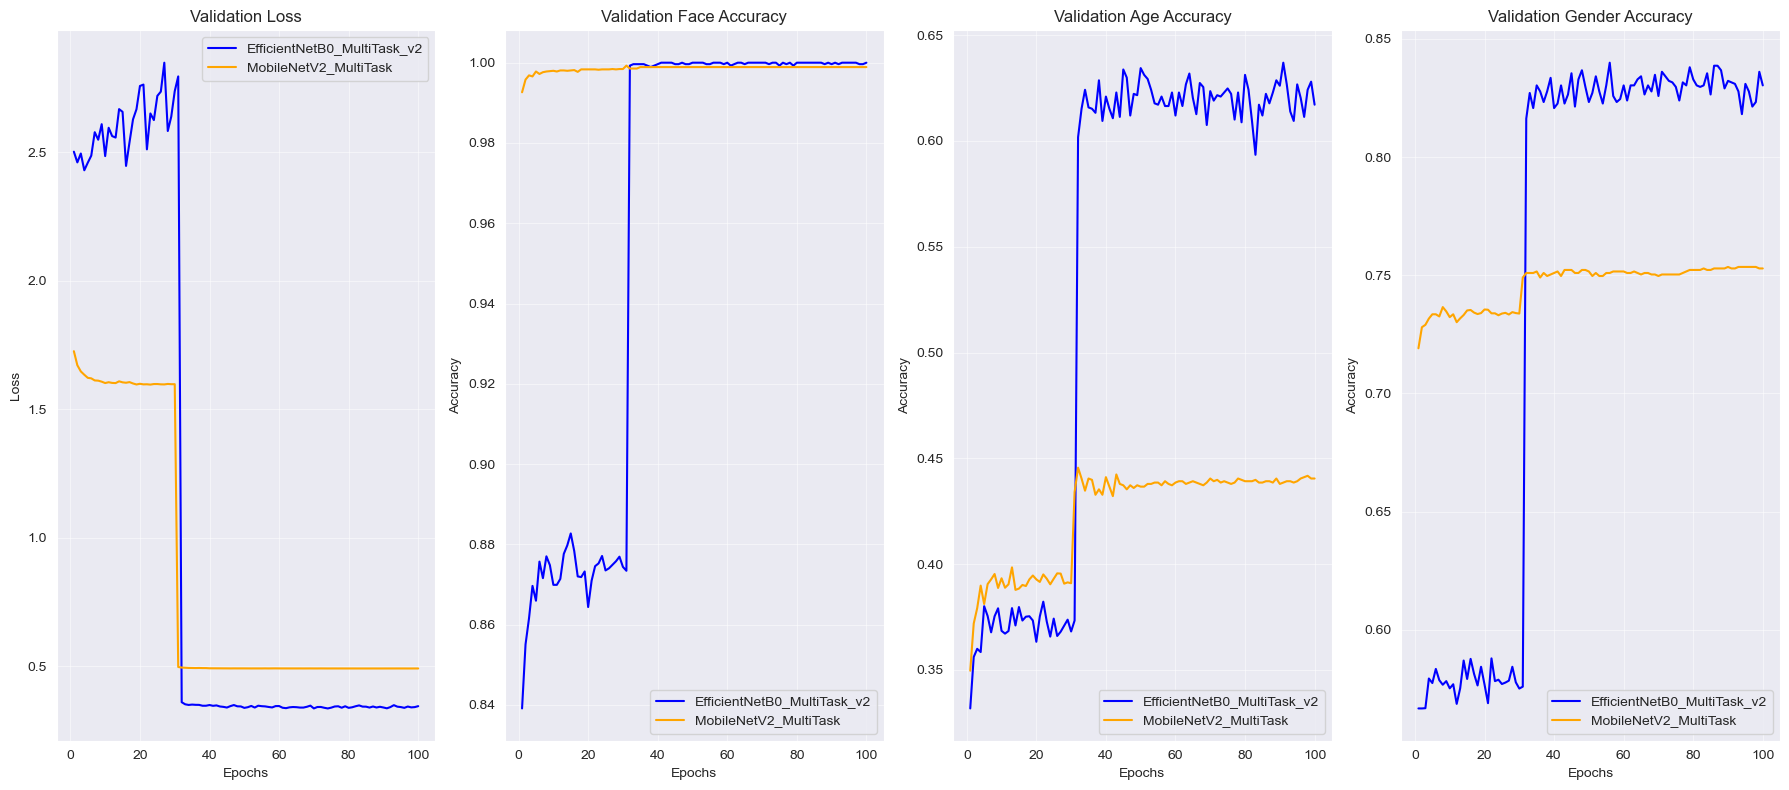

In [4]:
json_files = [
    "../results/Multi_Task/EfficientNetB0_MultiTask_v2/EfficientNetB0_MultiTask_v2_training_info.json",
    "../results/Multi_task/MobileNetV2_MultiTask/MobileNetV2_MultiTask_training_info.json",
]

plot_train_and_val_metrics(json_files)